ANÁLISE DE TURNOVER 

O Turnover (rotatividade de funcionários) é um grande problema para as empresas. Sempre que um funcionário deixa um determinado trabalho, a empresa perde dinheiro e tempo com novas entrevistas e treinamentos do novo funcionário. Isso sem falar da perda de produtividade do setor afetado por esse turnover. São muitas as questões que fazem um funcionário deixar a empresa, entre eles: Melhores oportunidades, clima organizacional ruim, chefes ruins, baixo equilíbrio entre vida pessoal e profissional, entre outros.

Para tentar entender quais as características que fazem um funcionário ficar ou deixar uma empresa de Tecnologia, o RH desta empresa catalogou informações de 1470 funcionários que deixaram ou permaneceram na companhia no último ano. O resultado desse levantamento gerou 19 possíveis fatores que explicam o comportamento do turnover, que estão disponíveis no arquivo Base_RH.xlsx. Para conhecer esses fatores, verifique a tabela de metadados existente na guia Metadados.

Com base nisso, o RH encomendou um estudo para o analista de dados da área para responder a seguinte pergunta:

Quais políticas/fatores da empresa deveriam mudar de forma a minimizar o turnover?

In [1]:
# Importando as bibliotecas necessárias para análose de dados

import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats 

Tabulando a Base para identifcar suas colunas e valores

In [2]:
import pandas as pd  

# Carregar o arquivo Excel
xls = pd.ExcelFile('C:/projeto/turnover/base_rh.xlsx')

df_base = pd.read_excel(xls, sheet_name='Base')

# Exibir as 5 primeiras linhas do DataFrame
print(df_base.head())

   ID Funcionário_deixou_a_empresa  Idade Frequência de Viagens  \
0   1                          Sim     41       Viaja raramente   
1   2                          Não     49  Viaja frequentemente   
2   3                          Sim     37       Viaja raramente   
3   4                          Não     33  Viaja frequentemente   
4   5                          Não     27       Viaja raramente   

   Distância_do_trabalho        Formação       E-Sat Gênero Estado_Civil  \
0                      1  Ensino Técnico       Médio      M     Solteiro   
1                      8    Ensino Médio        Alto      H       Casado   
2                      2  Ensino Técnico  Muito Alto      H     Solteiro   
3                      3        Mestrado  Muito Alto      M       Casado   
4                      2    Ensino Médio       Baixo      H       Casado   

   Salário  ...  Faz_hora_extras? Perc_de_aumento  Qte_ações_da_empresa  \
0     5993  ...               Sim              11                

1 - Para calcular a porcentagem de turnover com base na coluna Funcionário_deixou_a_empresa, onde "Sim" indica que o funcionário saiu e "Não" indica que o funcionário permaneceu.

Contagem de 'Sim': 237
Contagem de 'Não': 1233
Percentual de Turnover (Sim): 16.12%


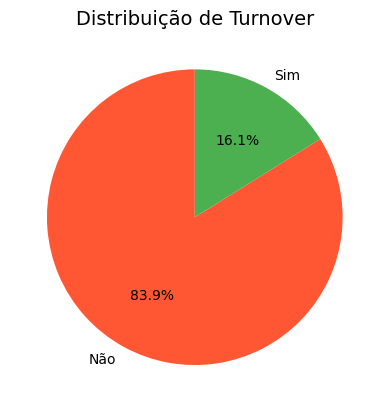

In [3]:
import matplotlib.pyplot as plt

# Contar os valores 'Sim' e 'Não'
contagem = df_base['Funcionário_deixou_a_empresa'].value_counts()

# Calcular a porcentagem de 'Sim'
total = contagem.sum()
percentual_sim = (contagem['Sim'] / total) * 100

print(f"Contagem de 'Sim': {contagem['Sim']}")
print(f"Contagem de 'Não': {contagem['Não']}")
print(f"Percentual de Turnover (Sim): {percentual_sim:.2f}%")

cores = ['#FF5733', '#4CAF50'] 

# Plotar o gráfico de pizza com as novas cores
contagem.plot.pie(autopct='%1.1f%%', startangle=90, colors=cores)

plt.title('Distribuição de Turnover', fontsize=14)

plt.ylabel('')  # Remover o rótulo do eixo Y
plt.show()


2 - Análise demográfica para avaliar a diversidade de gênero entre os funcionários.

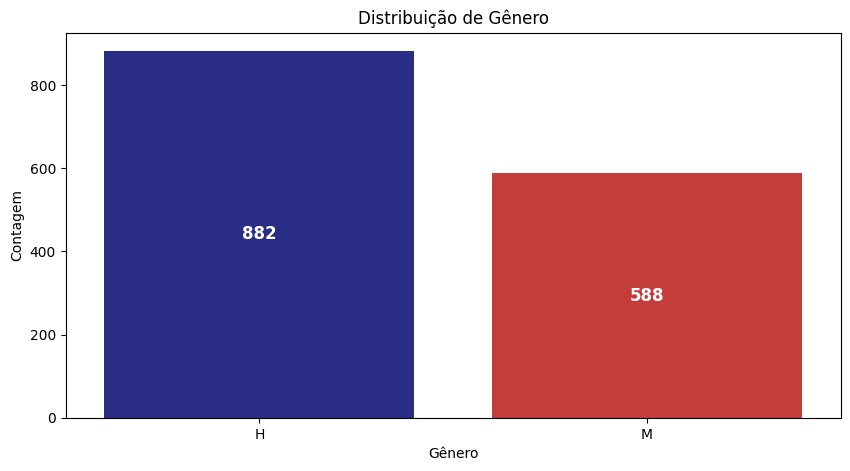

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Ajustando a ordem das categorias no eixo X
sns_plot = sns.countplot(x='Gênero', data=df_base, hue='Gênero', 
                         palette={'H': '#1b1f94', 'M': '#db2525'}, 
                         order=['H', 'M'])

# Adicionando os rótulos dentro das barras
for patch in sns_plot.patches:
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() / 2, 
             int(patch.get_height()), ha='center', va='center', 
             color='white', fontsize=12, fontweight='bold')

plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

plt.show()


3 - Analisar a distribuição do turnover entre os gêneros, identificando qual apresenta a maior taxa de desligamento e avaliar se essa diferença indica um padrão relevante para a gestão de pessoas.

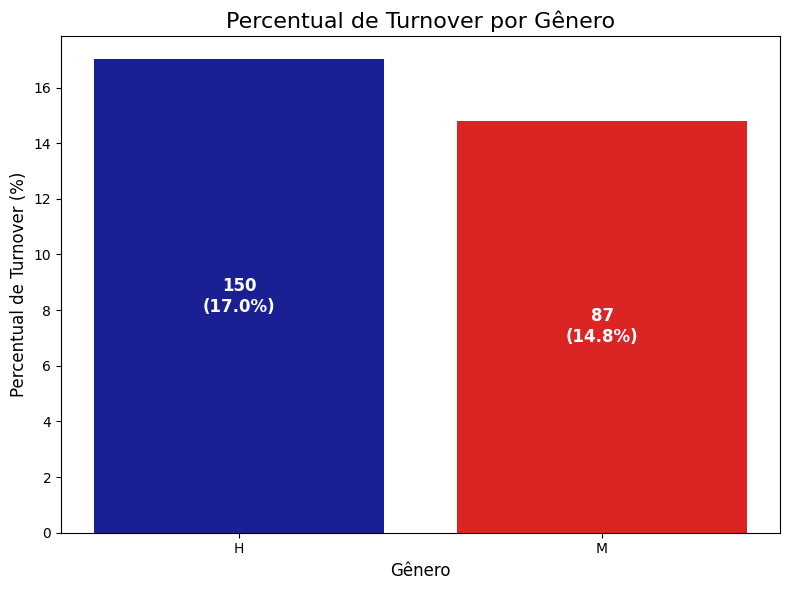

In [5]:
contagem_turnover_por_genero = df_base.groupby('Gênero')['Funcionário_deixou_a_empresa'].value_counts().unstack()

percentual_turnover_por_genero = (contagem_turnover_por_genero['Sim'] / (contagem_turnover_por_genero['Sim'] + 
                                  contagem_turnover_por_genero['Não'])) * 100

fig, ax = plt.subplots(figsize=(8, 6))
barras = ax.bar(percentual_turnover_por_genero.index, percentual_turnover_por_genero, color=['#1b1f94', '#db2525'])

for bar, genero in zip(barras, percentual_turnover_por_genero.index):
    altura = bar.get_height()
    quantidade = contagem_turnover_por_genero.loc[genero, 'Sim']  # Quantidade de 'Sim' para cada gênero
    ax.text(bar.get_x() + bar.get_width() / 2, altura / 2,  # Posição central na barra
            f'{quantidade}\n({altura:.1f}%)', 
            ha='center', va='center', fontsize=12, color='white', fontweight='bold')

ax.set_title('Percentual de Turnover por Gênero', fontsize=16)
ax.set_xlabel('Gênero', fontsize=12)
ax.set_ylabel('Percentual de Turnover (%)', fontsize=12)

plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()


4 - Criar um histograma para comparar a distribuição de idade por turnover, destacando que a faixa etária entre 20 e 35 anos foi responsável pelo maior número de desligamentos na empresa.

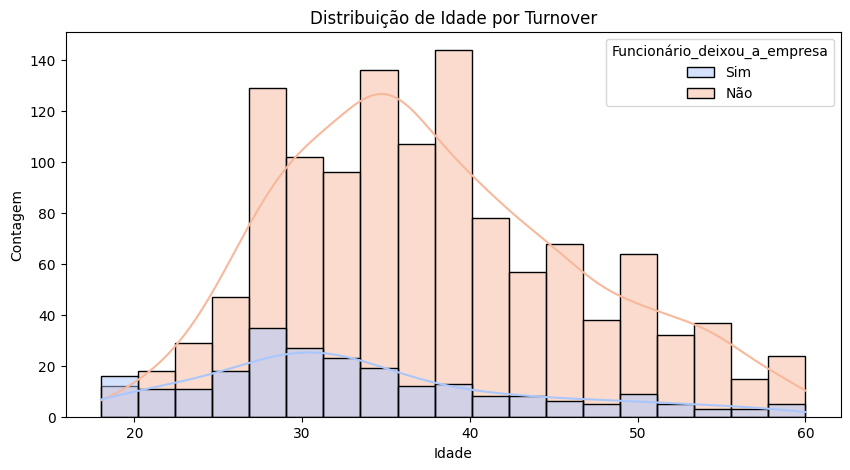

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_base, x="Idade", hue="Funcionário_deixou_a_empresa", kde=True, palette='coolwarm')
plt.title("Distribuição de Idade por Turnover")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()



5- Foi realizado um Teste T de Student para comparar a distância do trabalho entre funcionários que deixaram a empresa e os que permaneceram.

Hipótese nula (H₀): Não há diferença significativa na distância do trabalho entre os grupos.
Hipótese alternativa (H₁): Há uma diferença significativa na distância do trabalho entre os grupos.
Se o p-valor for menor que 0.05, podemos rejeitar a hipótese nula e concluir que a distância do trabalho influencia o turnover. Caso contrário, não há evidências estatísticas para afirmar essa relação.

In [7]:
# Teste T de Student entre duas amostras (por exemplo, turnover e distância de trabalho)
grupo_sim = df_base[df_base['Funcionário_deixou_a_empresa'] == 'Sim']['Distância_do_trabalho']
grupo_nao = df_base[df_base['Funcionário_deixou_a_empresa'] == 'Não']['Distância_do_trabalho']

# Realizando o Teste T
t_stat, p_value = stats.ttest_ind(grupo_sim, grupo_nao)
print(f"Estatística T: {t_stat:.2f}, p-valor: {p_value:.4f}")

# Interpretando o resultado
if p_value < 0.05:
    print("Há uma diferença significativa na distância do trabalho entre os grupos de turnover.")
else:
    print("Não há uma diferença significativa na distância do trabalho entre os grupos de turnover.")


Estatística T: 2.99, p-valor: 0.0028
Há uma diferença significativa na distância do trabalho entre os grupos de turnover.


Como o p-valor é menor que 0.05, podemos rejeitar a hipótese nula e concluir que há uma diferença estatisticamente significativa na distância do trabalho entre os grupos de turnover. Isso sugere que a distância pode ser um fator relevante para a saída dos funcionários.
Podemos observar esses dados no Bloxpot abaixo:

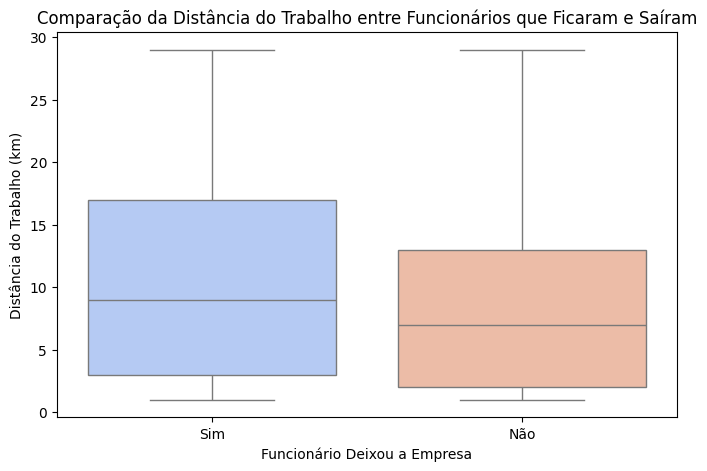

In [8]:
plt.figure(figsize=(8, 5))

sns.boxplot(x="Funcionário_deixou_a_empresa", 
            y="Distância_do_trabalho", 
            data=df_base, 
            hue="Funcionário_deixou_a_empresa",  # Define as cores com base na variável categórica
            palette="coolwarm",
            legend=False)  # Remove legenda extra

plt.title("Comparação da Distância do Trabalho entre Funcionários que Ficaram e Saíram")
plt.xlabel("Funcionário Deixou a Empresa")
plt.ylabel("Distância do Trabalho (km)")

plt.show()


6 - Calcular a média do tempo de empresa para avaliar se funcionários com mais tempo de casa têm maior retenção em seus cargos.

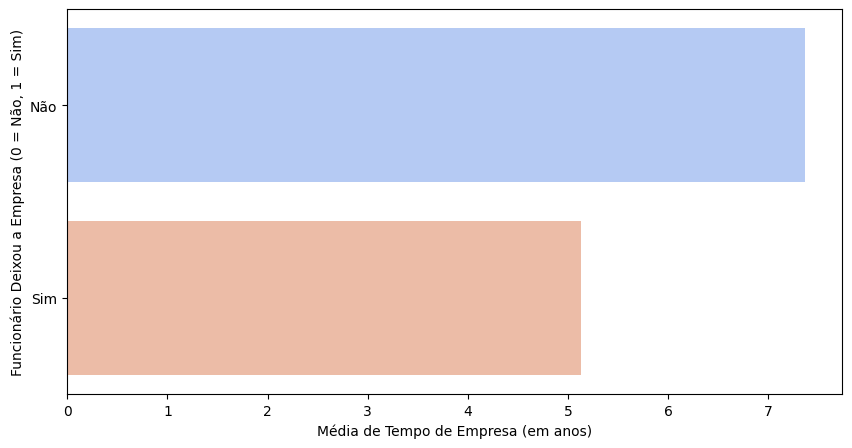

In [9]:
# Calcular a média do tempo de empresa para cada categoria de "Funcionário_deixou_a_empresa"
mean_tempo = df_base.groupby('Funcionário_deixou_a_empresa')['Tempo_de_empresa'].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.barplot(x='Tempo_de_empresa', y='Funcionário_deixou_a_empresa', data=mean_tempo, palette="coolwarm", hue='Funcionário_deixou_a_empresa', orient='h')

plt.xlabel("Média de Tempo de Empresa (em anos)")
plt.ylabel("Funcionário Deixou a Empresa (0 = Não, 1 = Sim)")
plt.show()


7 - Criar um boxplot para analisar a distribuição do salário entre funcionários que deixaram a empresa e os que permaneceram, ajudando a identificar possíveis padrões relacionados ao turnover e remuneração. Podemos observar que os funcionários com salários mais altos tendem a permanecer na empresa, enquanto os salários mais baixos estão associados a uma maior taxa de turnover.

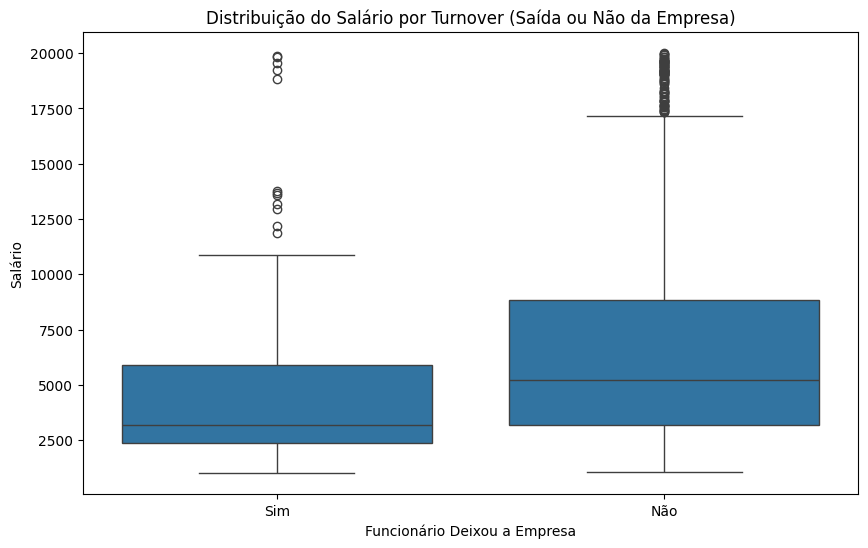

In [10]:
# Visualizando a distribuição do Salário em função do Turnover (se o funcionário saiu ou não)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_base, x='Funcionário_deixou_a_empresa', y='Salário')
plt.title("Distribuição do Salário por Turnover (Saída ou Não da Empresa)")
plt.xlabel("Funcionário Deixou a Empresa")
plt.ylabel("Salário")
plt.show()


8 - A tabela abaixo mostra a distribuição de formação acadêmica entre funcionários que deixaram a empresa e os que permaneceram. Podemos observar que os funcionários que não deixaram a empresa possuem índices mais elevados de ensino superior e mestrado, enquanto aqueles que deixaram a empresa têm maior concentração de ensino médio e ensino técnico. Isso sugere que a maior qualificação pode estar associada à permanência na empresa.

In [11]:
import pandas as pd
from tabulate import tabulate

# Criando a tabela
contingency_table = pd.crosstab(df_base['Funcionário_deixou_a_empresa'], df_base['Formação'])
contingency_table = contingency_table.reindex(index=['Sim', 'Não'], fill_value=0)

print(tabulate(contingency_table, headers='keys', tablefmt='grid'))


+--------------------------------+-------------+----------------+-------------------+------------------+------------+
| Funcionário_deixou_a_empresa   |   Doutorado |   Ensino Médio |   Ensino Superior |   Ensino Técnico |   Mestrado |
+================================+=============+================+===================+==================+============+
| Sim                            |           5 |             31 |                99 |               44 |         58 |
+--------------------------------+-------------+----------------+-------------------+------------------+------------+
| Não                            |          43 |            139 |               473 |              238 |        340 |
+--------------------------------+-------------+----------------+-------------------+------------------+------------+


Com base nas análises realizadas sobre o turnover, o RH pode considerar as seguintes estratégias para reduzir a taxa de saída de funcionários:

1 - Faixa Etária (20-35 anos): Investigar os motivos da saída dessa faixa etária, como falta de crescimento ou insatisfação, e oferecer mais oportunidades de desenvolvimento e reconhecimento.

2 - Gênero: A análise mostrou que os homens apresentaram uma taxa de turnover mais alta do que as mulheres, seria benéfico avaliar as oportunidades de carreira e benefícios para garantir que atendam igualmente a todos os colaboradores.

3 - Distância do Trabalho: Implementar ou expandir modelos de trabalho híbrido para funcionários que moram longe, aumentando a flexibilidade e diminuindo o impacto da distância.

4 - Tempo de Empresa: Para funcionários com mais tempo de casa, oferecer incentivos, promoções e programas de reconhecimento para manter a lealdade e evitar a perda de talentos de longo prazo.

5 - Salário: Analisar a competitividade salarial e garantir que os funcionários recebam uma compensação justa, além de oferecer benefícios extras para aqueles com salários mais baixos.

6 - Grau de Formação: Oferecer programas de capacitação para funcionários com menor nível de escolaridade, permitindo que eles cresçam dentro da empresa, além de revisar as políticas salariais para garantir maior retenção.

Essas ações podem ajudar a melhorar a satisfação e reduzir o turnover na empresa.

Conclusão:

Com base nas análises realizadas, é evidente que a redução do turnover depende de ações estratégicas direcionadas às necessidades específicas dos funcionários. Ao abordar questões como a falta de crescimento profissional, a distância do trabalho, a competitividade salarial e o grau de formação, o RH pode criar um ambiente mais atrativo e retenção de talentos mais eficaz. Investir em desenvolvimento, flexibilidade no trabalho, reconhecimento e uma compensação justa são medidas essenciais para garantir maior satisfação e engajamento dos colaboradores. Implementando essas mudanças, a empresa pode não apenas reduzir a taxa de turnover, mas também criar um ambiente mais estável e produtivo a longo prazo.